In [2]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

In [2]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [3]:
mask_path = "dataset/cat_and_dog_dataset/SegmentationClass"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in 'dataset/cat_and_dog_dataset/SegmentationClass'...
['cat.1.png', 'cat.10.png', 'cat.103.png', 'cat.106.png', 'cat.107.png', 'cat.109.png', 'cat.11.png', 'cat.110.png', 'cat.112.png', 'cat.115.png', 'cat.116.png', 'cat.127.png', 'cat.133.png', 'cat.137.png', 'cat.142.png', 'cat.16.png', 'cat.160.png', 'cat.2002.png', 'cat.2007.png', 'cat.2012.png', 'cat.2016.png', 'cat.2018.png', 'cat.2024.png', 'cat.2025.png', 'cat.2026.png', 'cat.2029.png', 'cat.2030.png', 'cat.2031.png', 'cat.2053.png', 'cat.2059.png', 'cat.2063.png', 'cat.2080.png', 'cat.2089.png', 'cat.2097.png', 'cat.21.png', 'cat.2114.png', 'cat.2128.png', 'cat.2138.png', 'cat.2176.png', 'cat.2187.png', 'cat.22.png', 'cat.2207.png', 'cat.2215.png', 'cat.2232.png', 'cat.2246.png', 'cat.2254.png', 'cat.2275.png', 'cat.2277.png', 'cat.2282.png', 'cat.2290.png', 'cat.2318.png', 'cat.2357.png', 'cat.2416.png', 'cat.2424.png', 'cat.2430.png', 'cat.2439.png', 'cat.2448.png', 'cat.2451.png', 'cat.2486.png', 'cat.286.png

Finding unique colors:   0%|                                                                          | 0/160 [00:00<?, ?it/s]

Finding unique colors: 100%|████████████████████████████████████████████████████████████████| 160/160 [00:28<00:00,  5.71it/s]


Scan complete!
Found 3 unique classes.


{(np.uint8(0), np.uint8(0), np.uint8(0)): 0,
 (np.uint8(0), np.uint8(128), np.uint8(0)): 1,
 (np.uint8(128), np.uint8(0), np.uint8(0)): 2}

In [6]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale




In [31]:
input_dir = "dataset/cat_and_dog_dataset/SegmentationClass"
output_dir = "dataset/cat_and_dog_dataset/encoded_masks"
mask_files = os.listdir(input_dir)
current_path = os.getcwd()

os.makedirs(os.path.join(current_path, output_dir), exist_ok=True)

for filename in tqdm(mask_files, desc="Encoding masks"):
    if filename.endswith(('.jpg', '.png')):
        mask_path = os.path.join(input_dir, filename)

        grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL).astype(np.uint8)

        save_path = os.path.join(current_path, output_dir, os.path.splitext(filename)[0] + '.jpg')
        cv2.imwrite(save_path, grayscale_label_mask)


Encoding masks: 100%|███████████████████████████████████████████████████████████████████████| 160/160 [00:05<00:00, 29.55it/s]


### Reread the encoded mask

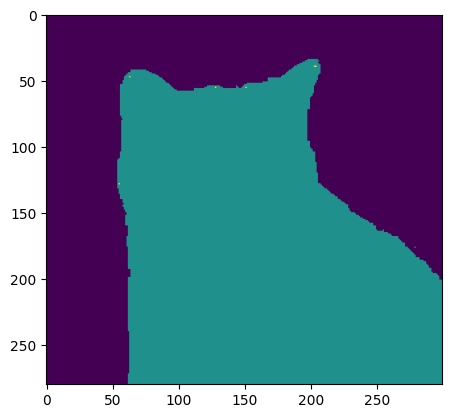

In [37]:
import matplotlib.pyplot as plt
save_path = "dataset/cat_and_dog_dataset/encoded_masks/cat.1.jpg"
new_grayscale_label_mask = cv2.imread(save_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(new_grayscale_label_mask)